In [6]:
!pip install qiskit
!pip install qiskit-aer

In [7]:
# Step 2: Import Libraries
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 3: Choose Function Type
# Options: 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'
function_type = 'balanced_1'

# Step 4: Define Oracle
def deutsch_oracle(qc, function_type):
    """Implements the oracle Uf for the chosen function type."""
    if function_type == 'constant_0':
        # f(x)=0 → Do nothing
        pass
    elif function_type == 'constant_1':
        # f(x)=1 → Apply X on the output qubit
        qc.x(1)
    elif function_type == 'balanced_0':
        # f(x)=x → Apply CNOT (control: input, target: output)
        qc.cx(0, 1)
    elif function_type == 'balanced_1':
        # f(x)=NOT(x) → Apply X, then CNOT, then X
        qc.x(0)
        qc.cx(0, 1)
        qc.x(0)
    else:
        raise ValueError("Invalid function type. Choose from 'constant_0', 'constant_1', 'balanced_0', 'balanced_1'.")

In [8]:
# Step 5: Create Deutsch Circuit
qc = QuantumCircuit(2, 1)

# Initialize |x>|y> = |0>|1> and apply Hadamard
qc.x(1)              # Set output qubit to |1>
qc.barrier()
qc.h([0, 1])         # Apply Hadamard to both qubits

# Apply Oracle
qc.barrier()
deutsch_oracle(qc, function_type)

# Apply Hadamard on input qubit
qc.barrier()
qc.h(0)

# Measure input qubit
qc.measure(0, 0)

In [9]:
# Step 6: Display Quantum Circuit
print("Deutsch Algorithm Quantum Circuit:\n")
try:
    # Try the prettier matplotlib drawing (requires pylatexenc)
    display(qc.draw(output='mpl'))
except Exception:
    # Fallback: print a plain-text circuit (always works)
    print(qc.draw(output='text'))


# Step 7: Simulate using AerSimulator
sim = AerSimulator()
qc_compiled = transpile(qc, sim)
result = sim.run(qc_compiled).result()
counts = result.get_counts()

# Step 8: Display Simulation Result
print("\nMeasurement Results:", counts)

Deutsch Algorithm Quantum Circuit:

           ░ ┌───┐ ░ ┌───┐     ┌───┐ ░ ┌───┐┌─┐
q_0: ──────░─┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤M├
     ┌───┐ ░ ├───┤ ░ └───┘┌─┴─┐└───┘ ░ └───┘└╥┘
q_1: ┤ X ├─░─┤ H ├─░──────┤ X ├──────░───────╫─
     └───┘ ░ └───┘ ░      └───┘      ░       ║ 
c: 1/════════════════════════════════════════╩═
                                             0 

Measurement Results: {'1': 1024}


→ The function is BALANCED.

Measurement Histogram:


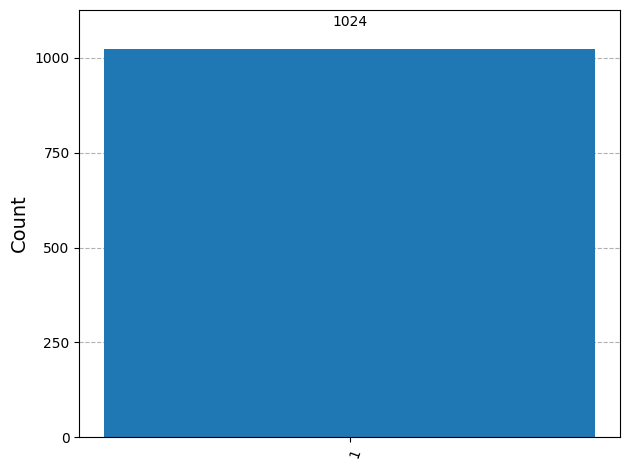

In [10]:
# Step 9: Interpret Output
key = max(counts, key=counts.get)
if key == '0':
    print("→ The function is CONSTANT.")
else:
    print("→ The function is BALANCED.")

# Step 10: Plot Measurement Histogram
# Step 10: Plot Measurement Histogram
print("\nMeasurement Histogram:")

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

fig = plot_histogram(counts)   # Create the histogram as a Figure
display(fig)                   # Force display in Colab output
plt.close(fig)                 # Close extra Matplotlib window (prevents duplication)